In [1]:
# importing libraries

import numpy as np
import time 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


from science_jubilee.Machine import Machine
from science_jubilee.tools.Tool import Tool
from science_jubilee.decks.Deck import Deck
from science_jubilee.labware.Labware import Labware, Location, Well
from science_jubilee.tools.Pipette import Pipette
from science_jubilee.tools.Double_Syringe import DoubleSyringe
from science_jubilee.tools.Vacuum_Gripper import VacuumGripper
from science_jubilee.tools.Oceandirect_axo import Spectrometer

In [2]:
# Manual Offsetting 

deck = Deck("lab_automation_deck") # We are not using the deck, so operate any deck.json 

# -------------Position JSON file for Pipette ---------------------#
tiprack = deck.load_labware(labware_filename = 'opentrons_96_tiprack_1000ul_axo.json', slot = 5)   # Load an opentrons 20uL
tiprack.manual_offset2([[274.1, 219.8],[173.1, 220.0],[173.1, 282.0]], save = True)   # Save through list of list. List of coordinates should be A1 A12 H12 subsequently. 
samples_ot2 = deck.load_labware("uwsunlab_12_wellplate_4000ul_pipette_1.json", slot = 2)
samples_ot2.manual_offset2([[131.3, 135.5], [36.5, 135.8], [36.5, 176.8]], save = True)
samples2_ot2 = deck.load_labware("uwsunlab_12_wellplate_4000ul_pipette_2.json", slot = 0)
samples2_ot2.manual_offset2([[129.8, 40], [35.9, 38.8], [35.9, 79.8]], save = True)
solvent = deck.load_labware("uwsunlab_1_reservoir_60000ul.json", slot = 3)
solvent.manual_offset_small_plate([[225.2, 155.8]], save = True)
    
# -------------Position JSON file for Dual Syringe ---------------#
samples_sy = deck.load_labware('uwsunlab_6_wellplate_23000ul_sy_1.json', slot = 2)     #new config
samples_sy.manual_offset2([[125.7, 132.6],[48.6, 131.5], [48.6, 172.2]], save = True)
samples2_sy = deck.load_labware('uwsunlab_12_wellplate_4000ul_2.json', slot = 0)
samples2_sy.manual_offset2([[132.2, 36.3], [38.2, 36.3], [38.2, 77.5]], save = True)
precursors = deck.load_labware('uwsunlab_2_wellplate_60000ul.json', slot = 1)
precursors.manual_offset_small_plate([[245.0, 60.0], [197.0, 60.0]], save = True)
# -----------Position JSON file for Spectrometer----------------# 
# samples_spec = deck.load_labware('uwsunlab_12_wellplate_4000ul_spec_1.json', slot = 2)
samples_spec = deck.load_labware('uwsunlab_6_wellplate_23000ul_spec_1.json', slot = 2)   #new config
samples_spec.manual_offset2([[120.0, 133.3],[43.0, 133.2], [42.6, 173.2]], save = True)
samples2_spec = deck.load_labware('uwsunlab_12_wellplate_4000ul_spec_2.json', slot = 0)
samples2_spec.manual_offset2([[127.3, 35.6], [32.9, 35.6], [33.5, 77.4]], save = True)

 

# ----------Position JSON file for Vacuum Gripper---------------#

Manual offset applied to opentrons_96_tiprack_1000ul
Manual offset saved
Manual offset applied to uwsunlab_12_wellplate_4000ul
Manual offset saved
Manual offset applied to uwsunlab_12_wellplate_4000ul
Manual offset saved
Manual offset applied (1×1 plate),  x_adjust=0.0, y_adjust=0.0
Manual offset saved.
Manual offset applied to uwsunlab_6_wellplate_23000ul
Manual offset saved
Manual offset applied to uwsunlab_12_wellplate_4000ul
Manual offset saved
Manual offset applied (1×2 plate),  x_adjust=0.0, y_adjust=0.0
Manual offset saved.
Manual offset applied to uwsunlab_6_wellplate_23000ul
Manual offset saved
Manual offset applied to uwsunlab_12_wellplate_4000ul
Manual offset saved


In [3]:
# Intialising and homing the Machine 

axo = Machine(address = '192.168.1.2')

In [4]:
axo.home_all()
axo.move_to(z=180) # Safest Z location

In [5]:
# Loading the labwares

deck = axo.load_deck("lab_automation_deck")

## ---------------------OT2 1000ul Pipette ----------------------------##
tiprack = axo.load_labware("opentrons_96_tiprack_1000ul_axo.json", 5)
tiprack.load_manualOffset()
samples_ot2 = axo.load_labware('uwsunlab_12_wellplate_4000ul_pipette_1.json', 2)
samples_ot2.load_manualOffset()
samples2_ot2 = axo.load_labware('uwsunlab_12_wellplate_4000ul_pipette_2.json', 0)
samples2_ot2.load_manualOffset()
solvent = axo.load_labware('uwsunlab_1_reservoir_60000ul.json', 3)
solvent.load_manualOffset()
trash = (-0.9, 55.8, 99)
## -------------------------------------------------------------------##
#pipette = Pipette(0, "Pipette", brand = "opentron", model = "config", max_volume= 20, min_volume= 0, zero_position = (0,0,0),\
#    blowout_position=None, drop_tip_position = None, mm_to_ul = None)# model = "config")

## ---------------------Dual Syringe Pump ----------------------------##
samples_sy = axo.load_labware('uwsunlab_6_wellplate_23000ul_sy_1.json', 2)         #new config
samples_sy.load_manualOffset()
samples2_sy = axo.load_labware('uwsunlab_12_wellplate_4000ul_2.json', 0)
samples2_sy.load_manualOffset()
precursors = axo.load_labware('uwsunlab_2_wellplate_60000ul.json', 1)
precursors.load_manualOffset()
## ------------------------------------------------------------------##

## --------------------------Spectrometer -------------------------------##
samples_spec = axo.load_labware('uwsunlab_6_wellplate_23000ul_spec_1.json', 2)  #new config
samples_spec.load_manualOffset()
samples2_spec = axo.load_labware('uwsunlab_12_wellplate_4000ul_spec_2.json', 0)
samples2_spec.load_manualOffset()
## ----------------------------------------------------------------------##

## ------------------------Vacuum Gripper --------------------------------##
vacuum_location = [(84, 51, 0),  # Slot 0 (12 Well Plate)
                   (225, 57, 0), # Slot 1 (2 Precursor Container)
                   (84, 147, 0), # Slot 2 (12 Well Plate)
                   (225, 149, 0), # Slot 3 (1 Solvent Container)
                   (79, 244, 0)] # Slot 4 (Lid Containter)



Manual offset applied to opentrons_96_tiprack_1000ul
Manual offset applied to uwsunlab_12_wellplate_4000ul
Manual offset applied to uwsunlab_12_wellplate_4000ul
Manual offset applied (1×1 plate),  x_adjust=0.0, y_adjust=0.0
Manual offset applied to uwsunlab_6_wellplate_23000ul
Manual offset applied to uwsunlab_12_wellplate_4000ul
Manual offset applied (1×2 plate),  x_adjust=0.0, y_adjust=0.0
Manual offset applied to uwsunlab_6_wellplate_23000ul
Manual offset applied to uwsunlab_12_wellplate_4000ul


In [6]:
deck.safe_z # The highest height among the labware loaded to the deck

97.47

In [7]:
# Loading the Dual Syringe

syringe = DoubleSyringe(index = 2, 
                        name = 'Syringe_Pump', 
                        config = '10cc_syringe')
# You always need to load your tool to the machine
axo.load_tool(syringe)

In [8]:
axo.pickup_tool(syringe)

In [9]:
syringe.reset_position()

In [10]:
axo.get_position()

{'X': '282.000',
 'Y': '230.000',
 'Z': '180.000',
 'U': '110.015',
 'V': '0.000',
 'E': '0.000',
 'E0': '-0.0',
 'E1': '-0.0'}

In [46]:
# If the syringe has some water inside it, and we dont want to reset its position, we can use the following code
# In this code we can move the syringe to the precursor location and then reset its position

drive0 = syringe.e0_drive
current_pos0 = float(syringe._machine.get_position()[drive0])
headroom_mm0 = current_pos0 - syringe.min_range
headroom_ml0 = headroom_mm0 / syringe.mm_to_ml
syringe.dispense_e0(vol= headroom_ml0, sample_loc_e=precursors[1], refill_loc_e=precursors[1], s=50)
# print(current_pos0)

6.532981240028607

In [10]:
drive1 = syringe.e1_drive
current_pos1 = float(syringe._machine.get_position()[drive1])
headroom_mm1 = current_pos1 - syringe.min_range
headroom_ml1 = headroom_mm1 / syringe.mm_to_ml
syringe.dispense_e1(vol= headroom_ml1, sample_loc_v=precursors[0], refill_loc_v=precursors[0], s=50)
# print(current_pos1)

0.0

In [ ]:
# Aspirate any syringe by a given amount. Just remember that the location of the syringe is decided by the location of the syringe 1
# syringe.aspirate_e0(vol= 1, refill_loc_e=precursors[1], s=50)
syringe.aspirate_e1(vol= 1, refill_loc_v=precursors[0], s=50)

1.0

In [14]:
# Refill any syringe. 
# See why do we have the type error even after i removed the priming code?
syringe.refill(drive = syringe.e0_drive, refill_loc = precursors[0], s = 50)
# syringe.refill(drive = syringe.e1_drive, refill_loc = precursors[0], s = 50)

In [ ]:
# Now we dont need to prime the syringe using the below code
# I have made changes in the refill function of the dual_syringe class. Now the syringe is automatically primed after every refill

# # Aspirate 10ml Water into the syringe[0]
# syringe.aspirate_e0(10, precursors[1], s=100)
# # Dispense 0.5ml in order to prime the syringe for accurate first dose
# syringe.dispense_e0(2, precursors[1], precursors[1], s=250)

In [76]:
# Dispense 1ml water into open-beaker at Deck 0 
syringe.dispense_e0(0.05, samples2_sy['A1'].top(2), precursors[0], s=50)

0.05

In [105]:
syringe.reset_position()

In [106]:
axo.park_tool()

The Below plot shows the dependence of the Standard Deviation of the Dispense Volume on the needle type. 

Suppose we take a target dispense of 1ml, and we take 5 readings of the dispense volume. The standard deviation of the dispense volume readings shows us the precision of the dispense. 

The Blue curve is the plot of the standard deviation of the dispense volume for the 0.5mm needle. The orange curve is the plot of the standard deviation of the dispense volume for the 1.2mm needle. The green curve is the plot of the standard deviation of the dispense volume for the 1.6mm needle. 

We can see that standard deviation of the 0.5mm needle consistently has lower standard deviation than the other two needles. This means that the 0.5mm needle is more precise than the other two needles. The 0.5mm needle has the most stable dispense volume. 

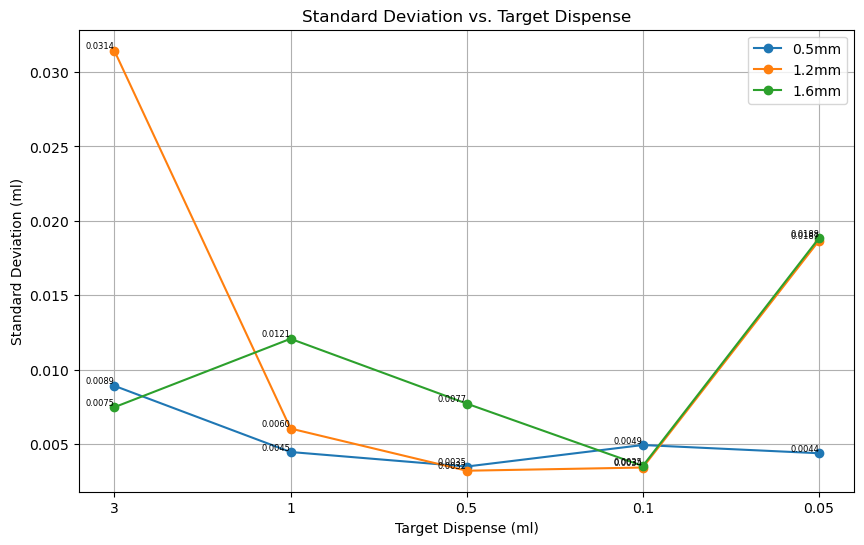

In [97]:
# Visualisation of the data 

#plot for Standard Deviation vs. target dispense(in ml) for different needle types
# It basically shows that sharper needle have more stable dispense

target_dispense = [3, 1, 0.5, 0.1, 0.05]
needle_type = ['0.5mm', '1.2mm', '1.6mm']    # 1.2mm was the needle that as being used originally 
std_dev_0_5 = [0.008914769962, 0.004467276547, 0.003491566482, 0.004936869799, 0.004384881993 ]
std_dev_1_2 = [0.03143058061, 0.006044575463, 0.003209942312, 0.003424312578, 0.01866257257] 
std_dev_1_6 = [0.007478103294, 0.01207499569, 0.007720694154, 0.003527604914, 0.01883446922]

plt.figure(figsize=(10, 6))
x_positions = range(len(target_dispense))
plt.plot(x_positions, std_dev_0_5, label='0.5mm', marker='o')
plt.plot(x_positions, std_dev_1_2, label='1.2mm', marker='o')
plt.plot(x_positions, std_dev_1_6, label='1.6mm', marker='o')
plt.xlabel('Target Dispense (ml)')
plt.ylabel('Standard Deviation (ml)')
plt.title('Standard Deviation vs. Target Dispense')

# Set custom x-axis labels
plt.xticks(x_positions, target_dispense)

for i in range(len(std_dev_0_5)):
    plt.text(x_positions[i], std_dev_0_5[i], f'{std_dev_0_5[i]:.4f}', ha='right', va='bottom', fontsize=6)
    plt.text(x_positions[i], std_dev_1_2[i], f'{std_dev_1_2[i]:.4f}', ha='right', va='bottom', fontsize=6)
    plt.text(x_positions[i], std_dev_1_6[i], f'{std_dev_1_6[i]:.4f}', ha='right', va='bottom', fontsize=6)
plt.legend()
plt.grid(True)
plt.show()

# From the plot, its clear that 0.5mm needle consistently have stable dispense
# 1.6mm needle have stable dispense but have the water droplet retention problem

The Below plot shows the Mean Absolute Error percentage of the dual syringe for all the three needle types. We show the MAE percentage for different target dispense volumes. 

Here MAE percentage is defined as:
MAE percentage = (Mean Absolute Error / Target Dispense Volume) * 100
Mean Absolute Error is the average of the absolute differences between the target dispense volume and the actual dispense volume.

The plot for 0.5mm shows that the MAE percentage is less than 1% for all the target dispense volumes above 0.5ml. The MAE percentage is 4% for 0.1ml target dispense volume.
Since the MAE percentage rises sharpely as we lower the target dispense volume below 0.1ml, we can take the lowest acceptable dispense volume as 0.1ml.

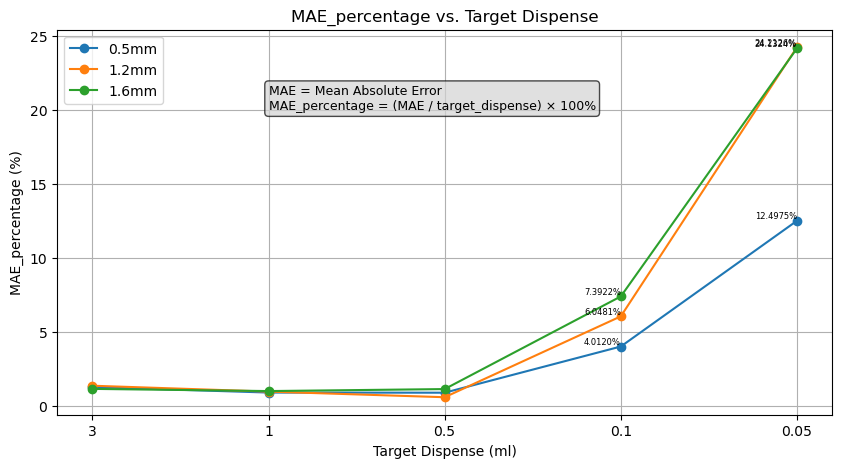

In [104]:
# Plot to show the Mean Absolute Error Percentage for 0.5mm, 1.2mm and 1.6mm needle types
# MAE_percentage = (MAE/target_dispense)*100 %             where MAE = Mean Absolute Error

target_dispense = [3, 1, 0.5, 0.1, 0.05]
MAE_0_5 = [1.274490137, 0.9047141424, 0.8946840522, 4.012036108, 12.49749248]
MAE_1_2 = [1.366098295, 0.9689067202, 0.5897693079, 6.048144433, 24.21263791]
MAE_1_6 = [1.152791708, 1.005015045, 1.139418255, 7.39217653, 24.13239719]

x_positions = range(len(target_dispense))

plt.figure(figsize=(10, 5))
plt.plot(x_positions, MAE_0_5, marker='o', label='0.5mm')
plt.plot(x_positions, MAE_1_2, marker='o', label='1.2mm')
plt.plot(x_positions, MAE_1_6, marker='o', label='1.6mm')

plt.xlabel('Target Dispense (ml)')
plt.ylabel('MAE_percentage (%)')
plt.title('MAE_percentage vs. Target Dispense')

# Set custom x-axis labels
plt.xticks(x_positions, target_dispense)

for i in range(3, len(target_dispense)):
    plt.text(x_positions[i], MAE_0_5[i], f'{MAE_0_5[i]:.4f}%', ha='right', va='bottom', fontsize=6)
    plt.text(x_positions[i], MAE_1_2[i], f'{MAE_1_2[i]:.4f}%', ha='right', va='bottom', fontsize=6)
    plt.text(x_positions[i], MAE_1_6[i], f'{MAE_1_6[i]:.4f}%', ha='right', va='bottom', fontsize=6)

plt.grid(True)
plt.legend(loc='upper left')
plt.text(1, 20, 'MAE = Mean Absolute Error\nMAE_percentage = (MAE / target_dispense) × 100%', 
         fontsize=9, color='black', bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.7))
plt.show()

# From the plot, its clear that sufficiently accurate dispense can be achieved till 0.1ml dispense.

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


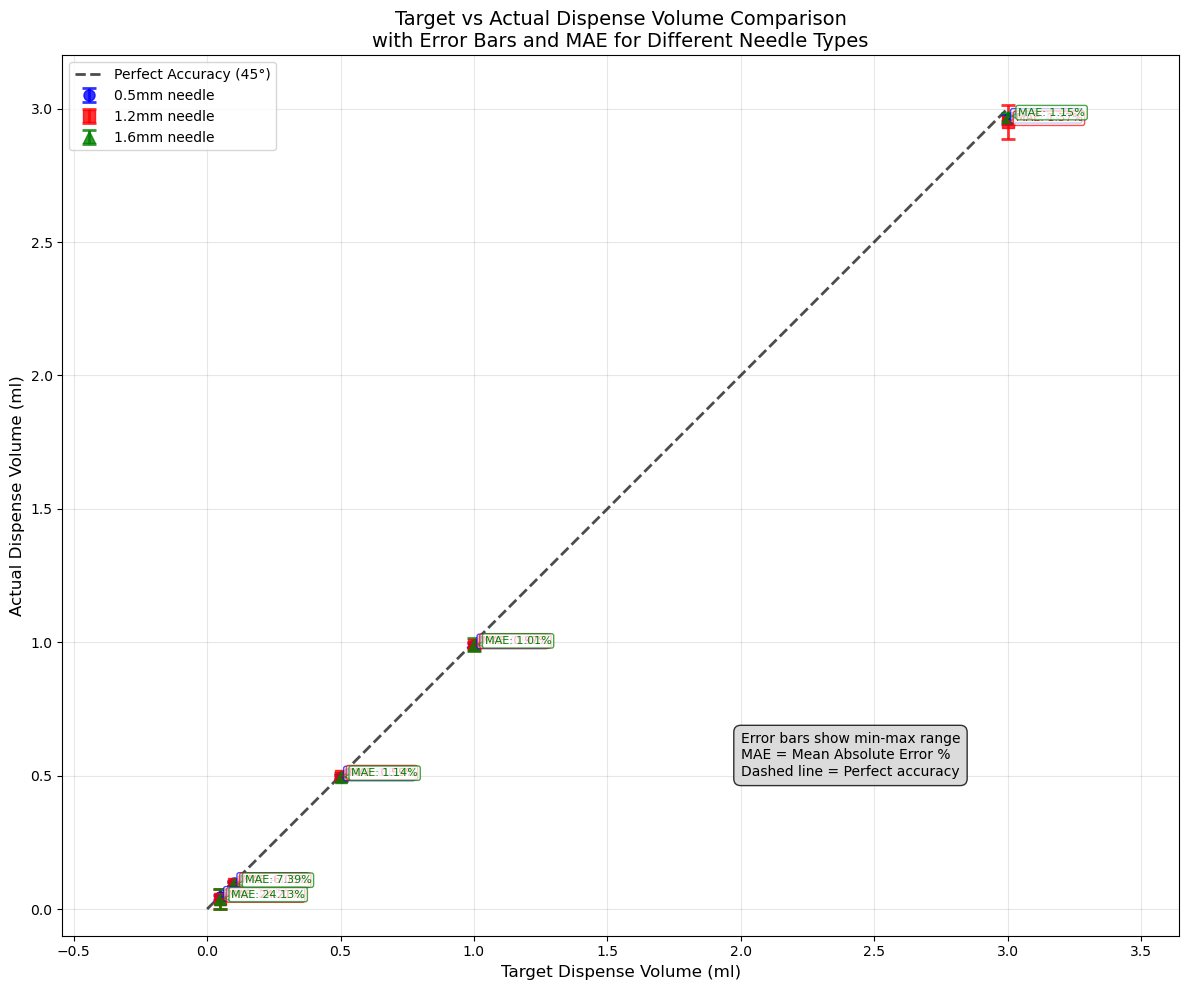

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your plots
target_dispense = [3, 1, 0.5, 0.1, 0.05]
needle_types = ['0.5mm', '1.2mm', '1.6mm']

# MAE data from your second plot
MAE_0_5 = [1.274490137, 0.9047141424, 0.8946840522, 4.012036108, 12.49749248]
MAE_1_2 = [1.366098295, 0.9689067202, 0.5897693079, 6.048144433, 24.21263791]
MAE_1_6 = [1.152791708, 1.005015045, 1.139418255, 7.39217653, 24.13239719]

# Generate mean actual volumes (assuming close to target with some variation)
np.random.seed(42)  # For reproducible results
mean_actual_0_5 = [2.96, 0.99, 0.495, 0.096, 0.044]
mean_actual_1_2 = [2.95, 0.99, 0.497, 0.094, 0.038]
mean_actual_1_6 = [2.97, 0.99, 0.494, 0.093, 0.039]

# Generate random min/max data for error bars (based on standard deviations)
std_dev_0_5 = [0.008914769962, 0.004467276547, 0.003491566482, 0.004936869799, 0.004384881993]
std_dev_1_2 = [0.03143058061, 0.006044575463, 0.003209942312, 0.003424312578, 0.01866257257]
std_dev_1_6 = [0.007478103294, 0.01207499569, 0.007720694154, 0.003527604914, 0.01883446922]

# Calculate min/max based on mean ± 2*std_dev for error bars
min_actual_0_5 = [mean - 2*std for mean, std in zip(mean_actual_0_5, std_dev_0_5)]
max_actual_0_5 = [mean + 2*std for mean, std in zip(mean_actual_0_5, std_dev_0_5)]

min_actual_1_2 = [mean - 2*std for mean, std in zip(mean_actual_1_2, std_dev_1_2)]
max_actual_1_2 = [mean + 2*std for mean, std in zip(mean_actual_1_2, std_dev_1_2)]

min_actual_1_6 = [mean - 2*std for mean, std in zip(mean_actual_1_6, std_dev_1_6)]
max_actual_1_6 = [mean + 2*std for mean, std in zip(mean_actual_1_6, std_dev_1_6)]

# Create the plot
plt.figure(figsize=(12, 10))

# Plot 45-degree reference line
max_vol = max(target_dispense)
plt.plot([0, max_vol], [0, max_vol], 'k--', alpha=0.7, linewidth=2, label='Perfect Accuracy (45°)')

# Colors for different needle types
colors = ['blue', 'red', 'green']
markers = ['o', 's', '^']

# Plot data for each needle type
for i, (needle, color, marker) in enumerate(zip(needle_types, colors, markers)):
    if needle == '0.5mm':
        mean_actual = mean_actual_0_5
        min_actual = min_actual_0_5
        max_actual = max_actual_0_5
        mae_data = MAE_0_5
    elif needle == '1.2mm':
        mean_actual = mean_actual_1_2
        min_actual = min_actual_1_2
        max_actual = max_actual_1_2
        mae_data = MAE_1_2
    else:  # 1.6mm
        mean_actual = mean_actual_1_6
        min_actual = min_actual_1_6
        max_actual = max_actual_1_6
        mae_data = MAE_1_6
    
    # Calculate error bars (distance from mean to min/max)
    yerr_lower = [mean - min_val for mean, min_val in zip(mean_actual, min_actual)]
    yerr_upper = [max_val - mean for mean, max_val in zip(mean_actual, max_actual)]
    
    # Plot points with error bars
    plt.errorbar(target_dispense, mean_actual, 
                yerr=[yerr_lower, yerr_upper],
                fmt=marker, color=color, markersize=8, 
                capsize=5, capthick=2, elinewidth=2,
                label=f'{needle} needle', alpha=0.8)
    
    # Add MAE annotations near each point
    for j, (target, actual, mae) in enumerate(zip(target_dispense, mean_actual, mae_data)):
        # Offset the text position slightly to avoid overlap
        offset_x = 0.02 + i * 0.01
        offset_y = 0.002 + i * 0.001
        plt.annotate(f'MAE: {mae:.2f}%', 
                    xy=(target, actual), 
                    xytext=(target + offset_x, actual + offset_y),
                    fontsize=8, color=color,
                    bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.7, edgecolor=color),
                    arrowprops=dict(arrowstyle='->', color=color, alpha=0.5))

# Customize the plot
plt.xlabel('Target Dispense Volume (ml)', fontsize=12)
plt.ylabel('Actual Dispense Volume (ml)', fontsize=12)
plt.title('Target vs Actual Dispense Volume Comparison\nwith Error Bars and MAE for Different Needle Types', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', fontsize=10)

# Set equal aspect ratio and appropriate limits
plt.axis('equal')
plt.xlim(-0.1, 3.2)
plt.ylim(-0.1, 3.2)

# Add text box with explanation
plt.text(2.0, 0.5, 'Error bars show min-max range\nMAE = Mean Absolute Error %\nDashed line = Perfect accuracy', 
         fontsize=10, bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))

plt.tight_layout()
plt.show()